# Kaggle Dataset Load

In [1]:
# !kaggle datasets download -d unsdsn/world-happiness

In [2]:
# !unzip world-happiness.zip

In [3]:
# !unzip 2019.csv

# Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [5]:
def clean_columns (df):
    df.columns = df.columns.str.replace(" ", "_").str.replace(".","_").str.replace("(", "").str.replace(")","").str.strip("_").str.lower()
    return df.columns


def year_to_cols (df, year):
    df.columns = [str(col + "_") + str(year) for col in df.columns]
    return df.columns

In [6]:
twenty19 = pd.read_csv("2019.csv", )
twenty18 = pd.read_csv("2018.csv", )
twenty17 = pd.read_csv("2017.csv", )
twenty16 = pd.read_csv("2016.csv", )
twenty15 = pd.read_csv("2015.csv", )

In [7]:
twenty19['year'] = 2019
twenty18['year'] = 2018
twenty17['year'] = 2017
twenty16['year'] = 2016
twenty15['year'] = 2015

# Exploration

In [8]:
twenty15.drop(columns="Standard Error", inplace=True)

In [9]:
twenty16.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval'], inplace=True)

In [10]:
twenty17.drop(columns=['Whisker.high', 'Whisker.low'], inplace=True)

C:\Users\alisa\anaconda3\envs\ml-env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 2015.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\alisa\anaconda3\envs\ml-env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 2015.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\alisa\anaconda3\envs\ml-env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 2015.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


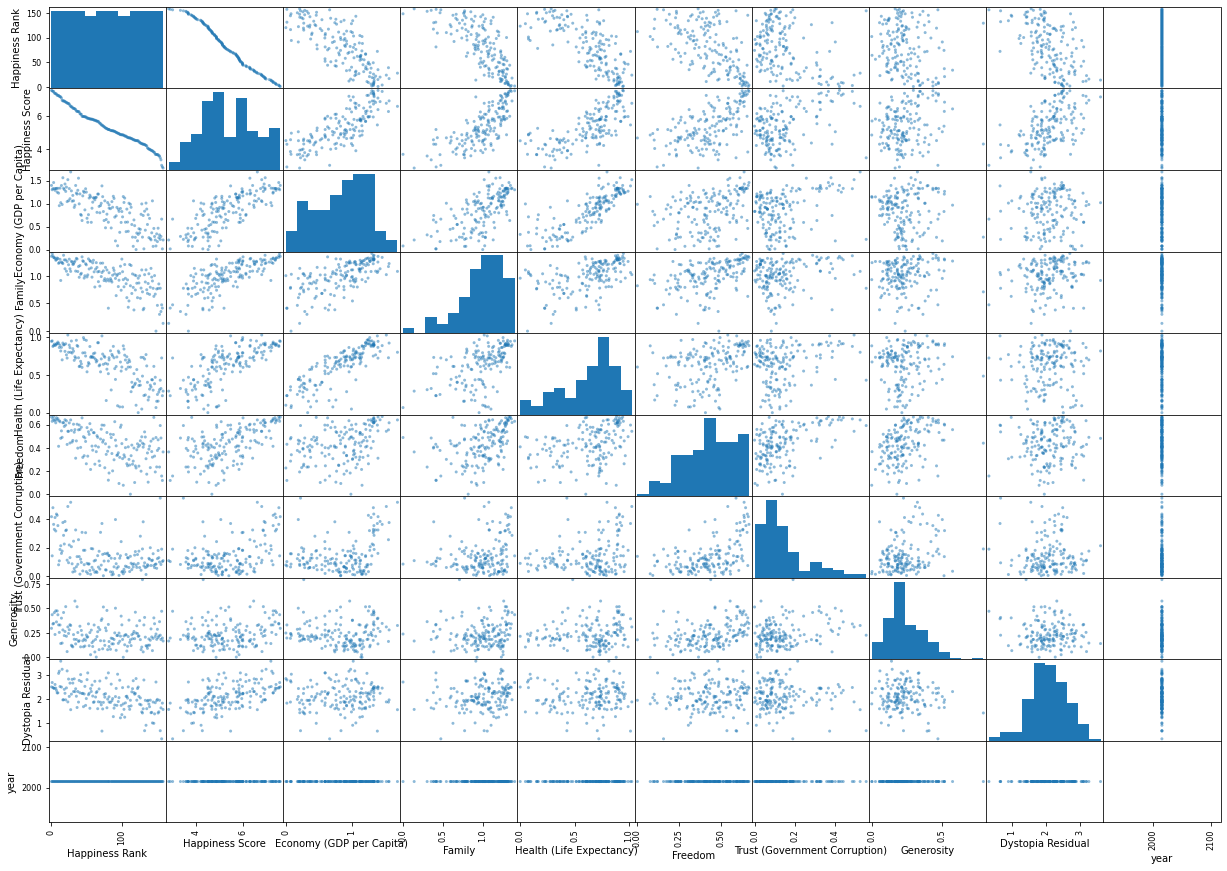

In [11]:
pd.plotting.scatter_matrix(twenty15, figsize=(21, 15),  )
plt.show()

There are def some columns that have a correlation to the happiness score. 

But, with the way the scatter matrix is displayed it is much harder to see what truly has a relationship

In [12]:
years = [twenty15, twenty16, twenty17, twenty18, twenty19]
num_years = [2015, 2016, 2017, 2018, 2019]

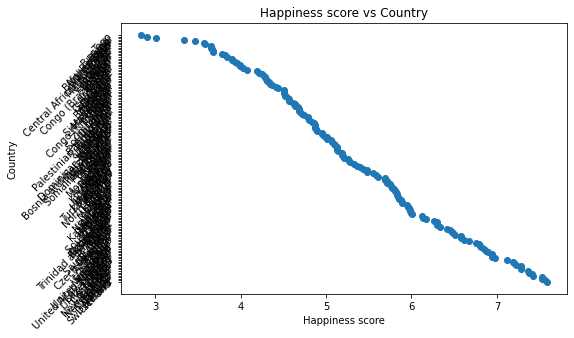

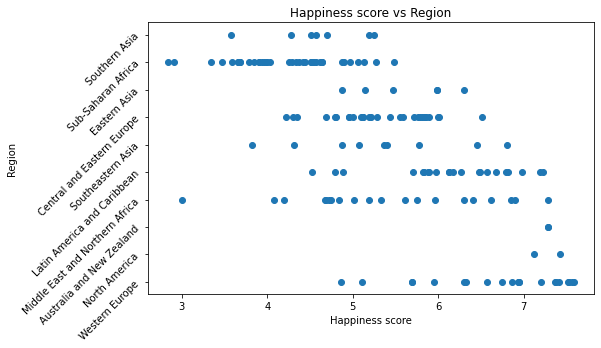

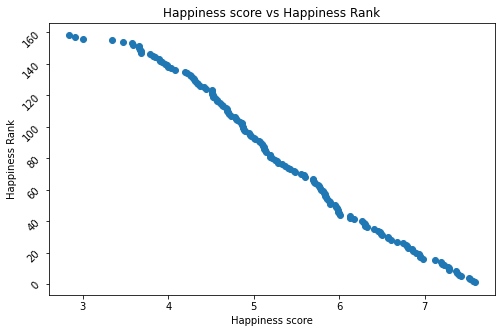

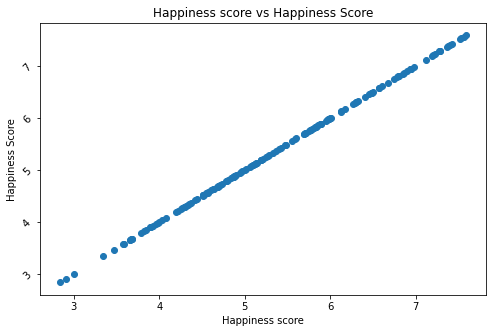

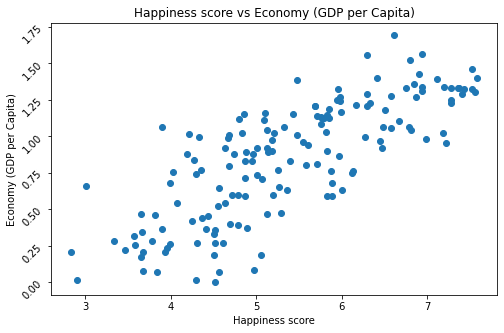

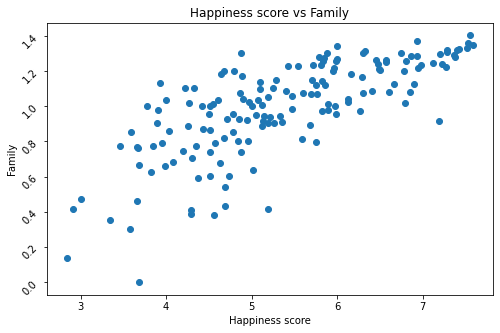

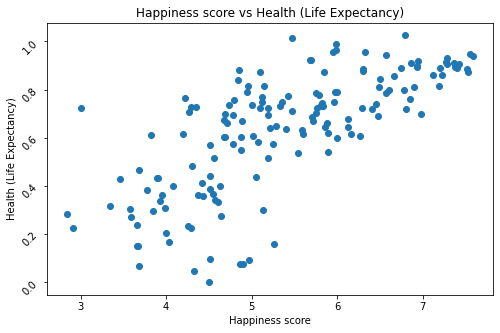

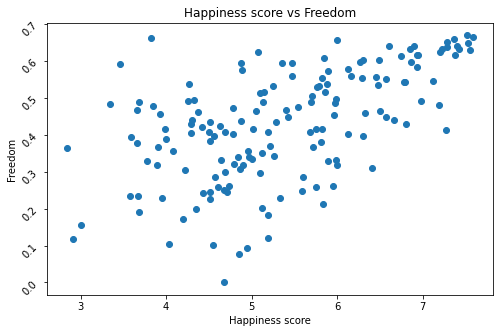

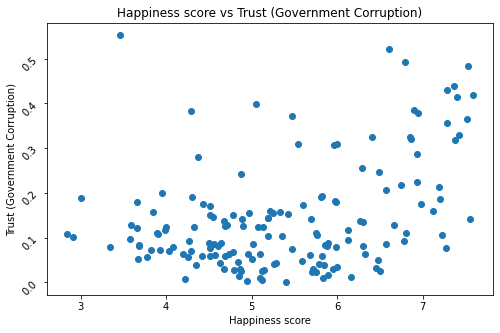

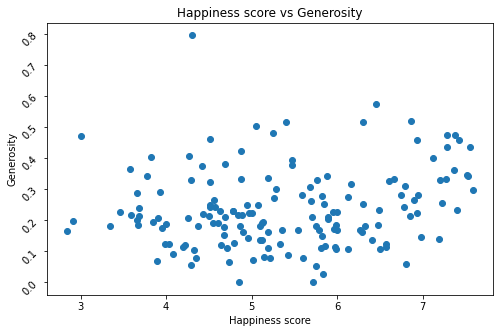

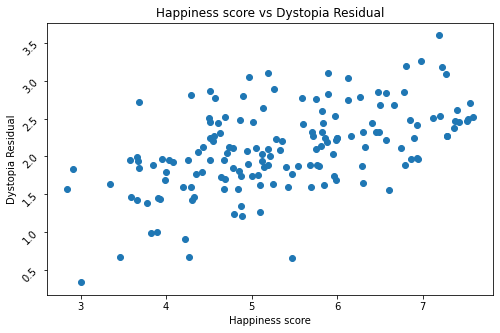

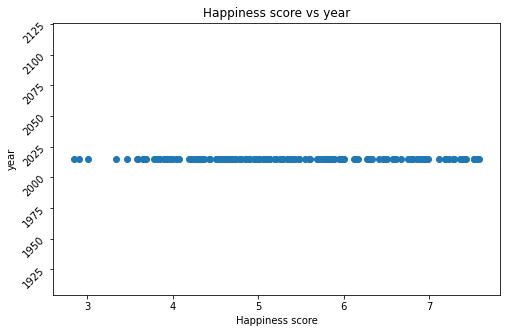

In [13]:
for col in twenty15.columns:
    plt.figure(figsize=(8,5))
    plt.scatter(twenty15['Happiness Score'], twenty15[col])
    plt.title("Happiness score vs " + col)
    plt.xlabel("Happiness score")
    plt.ylabel(col)
    plt.yticks(rotation=45)
    plt.show()

Text(0.5, 1.0, '2015 Correlation')

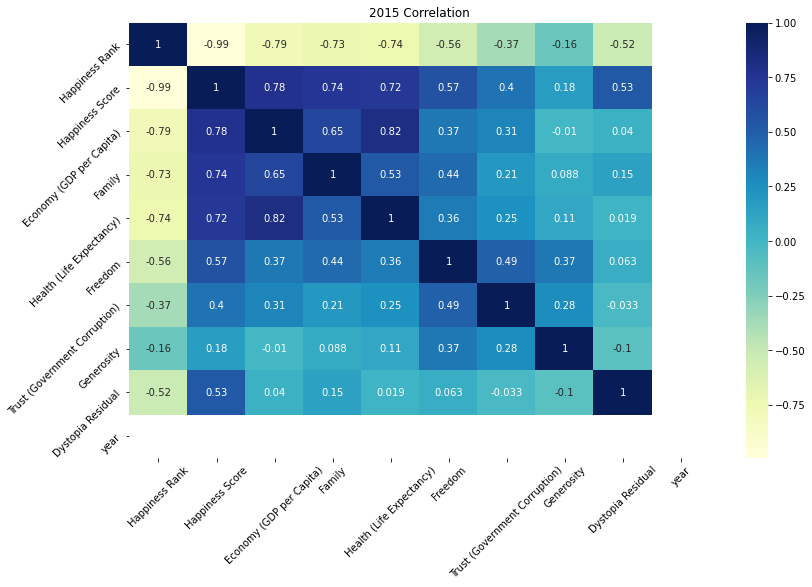

In [14]:
plt.figure(figsize=(13,8))
sns.heatmap(twenty15.corr(), annot=True, cmap="YlGnBu", )
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("2015 Correlation")

In [15]:
def correlation_heatmap(df, title):

    plt.figure(figsize=(13,8))
    sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", )
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.title(title +" Correlation Heatmap")
    plt.show()

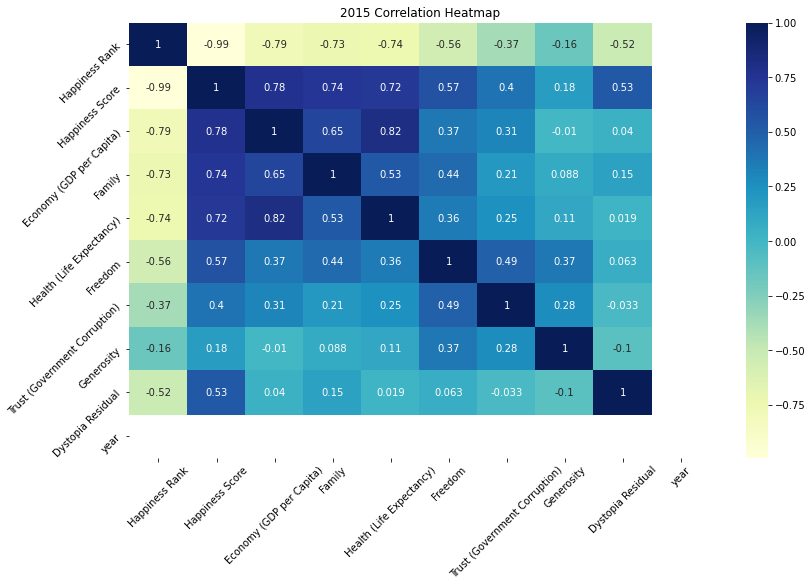

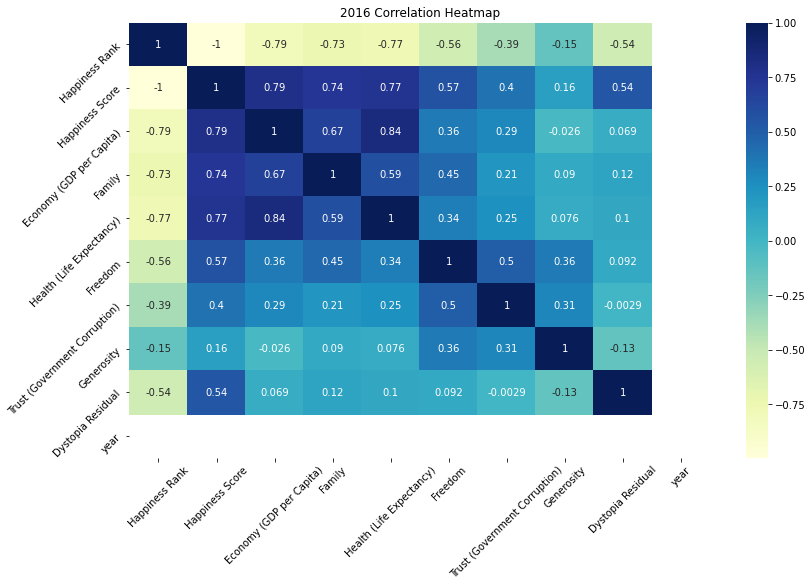

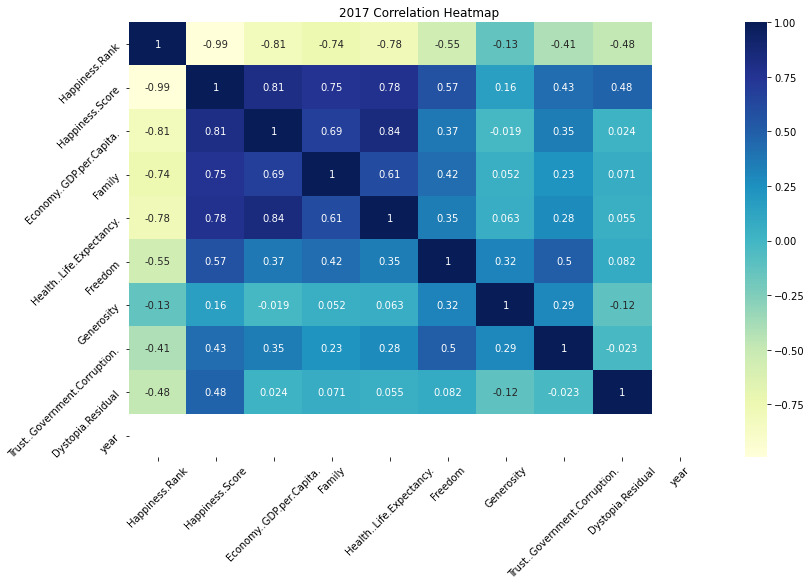

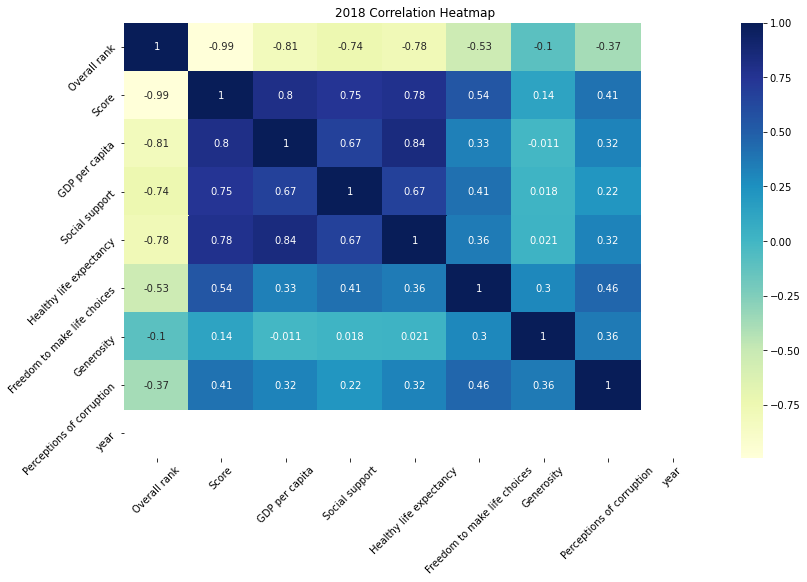

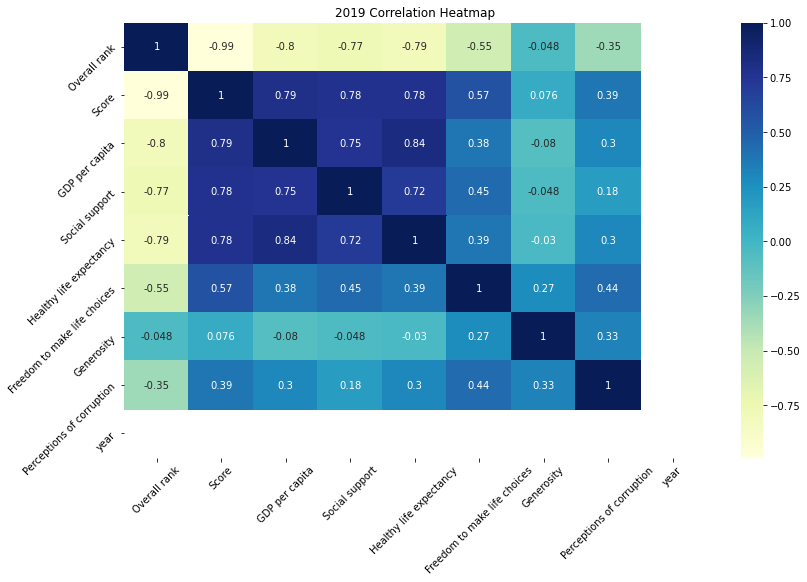

In [16]:
for num in range(len(years)):
    correlation_heatmap(years[num], str(num_years[num]))

# Looking into top correlating columns

Top correlating columns: 

GPD, <br> Family,<br> Health

In [17]:
twenty15.head(2)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [18]:
for year in years:
    clean_columns(year)

In [19]:
numb_year = [15,16,17,18,19]

for num in range(len(numb_year)):
    year_to_cols(years[num], numb_year[num])

<AxesSubplot:xlabel='economy_gdp_per_capita_15', ylabel='happiness_score_15'>

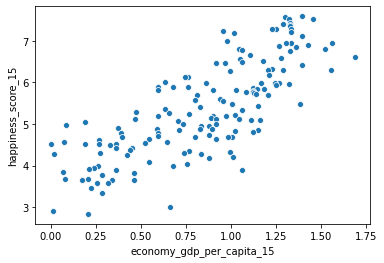

In [20]:
sns.scatterplot(twenty15['economy_gdp_per_capita_15'], twenty15['happiness_score_15'])

In [21]:
df = pd.concat(years)

In [26]:
df.drop(columns=['country_15', 'region_15', 'happiness_rank_15',
       'freedom_15', 'trust_government_corruption_15', 'generosity_15',
       'dystopia_residual_15', 'country_16', 'region_16',
       'happiness_rank_16', 'freedom_16',
       'trust_government_corruption_16', 'generosity_16',
       'dystopia_residual_16', 'country_17', 'happiness_rank_17',
        'freedom_17', 'generosity_17',
       'trust__government_corruption_17', 'dystopia_residual_17',
       'overall_rank_18', 'country_or_region_18',
       'freedom_to_make_life_choices_18', 'generosity_18',
       'perceptions_of_corruption_18', 'overall_rank_19',
       'country_or_region_19',
       'freedom_to_make_life_choices_19', 'generosity_19',
       'perceptions_of_corruption_19'], inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   happiness_score_15          158 non-null    float64
 1   economy_gdp_per_capita_15   158 non-null    float64
 2   family_15                   158 non-null    float64
 3   health_life_expectancy_15   158 non-null    float64
 4   year_15                     158 non-null    float64
 5   happiness_score_16          157 non-null    float64
 6   economy_gdp_per_capita_16   157 non-null    float64
 7   family_16                   157 non-null    float64
 8   health_life_expectancy_16   157 non-null    float64
 9   year_16                     157 non-null    float64
 10  happiness_score_17          155 non-null    float64
 11  economy__gdp_per_capita_17  155 non-null    float64
 12  family_17                   155 non-null    float64
 13  health__life_expectancy_17  155 non